In [1]:
import numpy as np
import matplotlib.pyplot as plt

from coin import COIN

%matplotlib inline
%load_ext autoreload
%autoreload 2

In [3]:
retention_values = np.linspace(0.8, 1, 500, endpoint=True)
drift_values = np.linspace(-0.1, 0.1, 500, endpoint=True)
state_values = np.linspace(-1.5, 1.5, 500, endpoint=True)
bias_values = np.linspace(-1.5, 1.5, 500, endpoint=True)
state_feedback_values = np.linspace(-1.5, 1.5, 500, endpoint=True)

store = [
    "state_feedback", "motor_output", "responsibilities", 
]

coin_model = COIN(
    retention_values=retention_values, 
    drift_values=drift_values, 
    state_values=state_values, 
    bias_values=bias_values, 
    state_feedback_values=state_feedback_values, 
    store=store, 
) # use default parameters for now
coin_model.perturbations = np.concatenate([
    np.zeros((50, )), 
    np.ones((125, )), 
    -np.ones((15, )), 
    np.ones((150, )) * np.nan, 
])

output = coin_model.simulate_coin()

Simulting the COIN model


  0%|          | 0/1 [00:00<?, ?it/s]/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin.py:615: RuntimeWarning: divide by zero encountered in log
  p_c = np.log(coin_state["prior_probabilities"])
  0%|          | 0/1 [00:00<?, ?it/s]

Unexpected exception formatting exception. Falling back to standard exception



Traceback (most recent call last):
  File "/Users/changminyu/miniconda3/envs/cyu_arm/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/6b/58_qt7d91c96pg2b8nn3nd2m0000gn/T/ipykernel_1961/767839841.py", line 26, in <cell line: 26>
    output = coin_model.simulate_coin()
  File "/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin.py", line 281, in simulate_coin
    coin_state = self.coin_generative_main_loop(trials)
  File "/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin.py", line 385, in coin_generative_main_loop
    coin_state = self.store_variables(coin_state)
  File "/Users/changminyu/Desktop/research/postdoc_CBL/remapping/codes/COIN/coin_python/coin.py", line 799, in store_variables
    coin_state = self.store_function(coin_state, variable)
  File "/Users/changminyu/Desktop/research/postdoc_CBL/remapping/

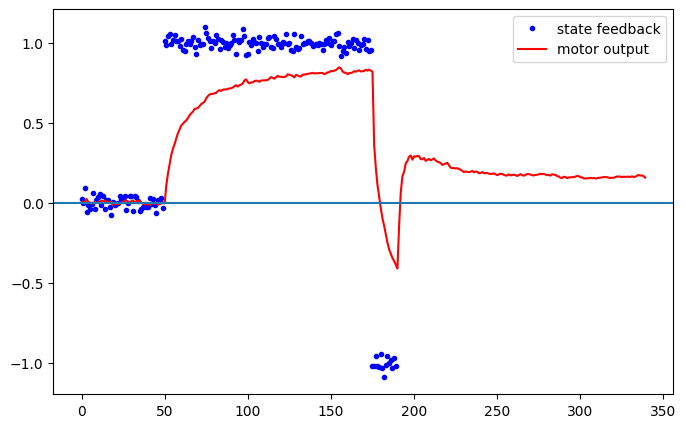

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(output["runs"][0]["state_feedback"], "b.", label="state feedback")
plt.plot(output["runs"][0]["motor_output"], "r", label="motor output")
plt.legend()
plt.axhline(0)